### Task 1a
$$
    f(x, y) = 
    \left\{\begin{matrix}
    k(x+2y) & 0\leq x, y \leq 1, x+y\leq 1 \\ 
    0 & \text{Otherwise}
    \end{matrix}\right.
$$
To find $k$, we need to have $\iint_\mathbb{R} f(x, y)dxdy = 1$.
\begin{align*}
    \int_\mathbb{R} f(x)dx 
    &= k \int_0^1 \int_0^{1-x} (x+2y)dydx \\
    &= k \int_0^1 (1-x)dx \\
    &= \frac{1}{2}\\
    \implies k &= 2
\end{align*}

### Task 1b
\begin{align*}
    f_Y(y) 
    &= \int_{\mathbb{R}} f(x, y)dx \\
    &= \int_0^{1-y} 2(x+2y)dx \\
    &= [x^2 + 4xy]_{x=0}^{x=1-y} \\
    &= 1 - 2y + y^2 + 4y - 4y^2 \\
    &= 1 + 2y - 3y^2 &  0 \leq y \leq 1
\end{align*}

### Task 1c
\begin{align*}
    f_{X|Y}(y) 
    &= \frac{f(x, y)}{f_Y(y)} \\
    &= \frac{2(x+2y)}{1+2y-3y^2} \\
    &= \frac{2x+4y}{1+2y-3y^2}
\end{align*}

### Task 1d
X and Y are independent if $ f_X(x) f_Y(y) = f(x, y)$. First we need to find $f_X(x)$:
\begin{align*}
    f_X(x) = \int_{\mathbb{R}} f(x, y) dy = \int_0^{1-x} (2x+4y)dy = 2-2x
\end{align*}
We can now calculate $f_X(x) f_Y(y)$:
\begin{align*}
    f_X(x) f_Y(y) 
    &= (2-2x)(1+2y-3y^2) \\
    &= 2 + 4y - 2x - 4xy + 6xy^2 \\
    &\ne f(x, y)
\end{align*}

### Task 2a

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats, scipy.interpolate

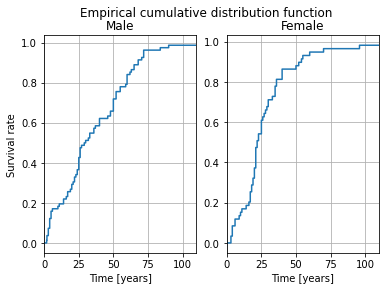

In [22]:
time = pd.read_csv(
    'https://www.uio.no/studier/emner/matnat/math/STK1100/data/egypt_data.txt',
    header=None
)

t_m = np.asarray(time[:82]).flatten()
t_f = np.asarray(time[82:]).flatten()

def empirical_cdf(x):
    return scipy.interpolate.interp1d(
                np.sort(x), 
                np.arange(len(x))/float(len(x)), 
                kind = 'zero', 
                fill_value = 'extrapolate'
            )

fig, ax = plt.subplots(ncols=2, sharex=True)
fig.suptitle('Empirical cumulative distribution function')
z = np.linspace(0, 110, 1000)

F_m = empirical_cdf(t_m)
ax[0].step(z, F_m(z))
ax[0].set(
    xlabel = 'Time [years]',
    ylabel = 'Survival rate',
    title = 'Male',
    xlim = (0, 110)
)
ax[0].grid()

F_f = empirical_cdf(t_f)
ax[1].step(z, F_f(z))
ax[1].set(
    xlabel = 'Time [years]',
    title = 'Female',
    xlim = (0, 110)
)
ax[1].grid()

plt.show()

### Task 2b
We can find $\alpha$ and $\Beta$ by using $\mathbb{E}(T)=\alpha\beta$ and $\text{Var}(T)=\alpha{\beta}^2$. This is done in $\verb|estimate_moments_gamma(t)|$

In [23]:
def estimate_moments_gamma(t):
    t_mean = np.mean(t)
    s_sq = np.var(t)

    beta = s_sq / t_mean
    alpha = t_mean / beta
    Ex = alpha * beta

    return alpha, beta, Ex

alpha_m, beta_m, Ex_m = estimate_moments_gamma(t_m)
alpha_f, beta_f, Ex_f = estimate_moments_gamma(t_f)

print(f'Gender: Male')
print(f'Alpha = {alpha_m:.3f}')
print(f'Beta = {beta_m:.3f}')
print(f'E(X) = {Ex_m:.2f} years \n')

print(f'Gender: Male')
print(f'Alpha = {alpha_f:.3f}')
print(f'Beta = {beta_f:.3f}')
print(f'E(X) = {Ex_f:.2f} years')

Gender: Male
Alpha = 2.211
Beta = 15.430
E(X) = 34.12 years 

Gender: Male
Alpha = 2.240
Beta = 11.572
E(X) = 25.92 years


We observe that the life expectancy is higher for males compared to females.

### Task 2c
We set $Y = \exp{X}$ where $X \sim N(\mu, \sigma)$. The transformation is given by $g(y) = f(v(y))|v'(y)|$. We set $Y=e^X$ which yields $x = \ln y$. This gives $|v'(y)|=v'(y) = \frac{1}{y}$. Using the PDF of a normally distributed random variable, we find
$$
    g(y) = 
    \frac{1}{y \sigma \sqrt{2 \pi }}
    \exp{
        \left[
            - \frac{{(\ln y - \mu)}^2}{2\sigma^2}
        \right]
    }
$$

### Task 2d
Rearranging the given relationships we get
$$
    \mu = \ln \bar{t} - \frac{\sigma^2}{2}, \hspace{0.5cm}
    \sigma^2 = \ln \left[
        1 + \frac{S^2}{{\bar{t}}^2}
    \right]
$$


In [24]:
def estimate_moments_lognormal(t):
    t_mean = np.mean(t)
    s_sq = np.var(t)

    sigma_sq = np.log(s_sq/(t_mean**2) + 1)
    mu = np.log(t_mean) - sigma_sq/2
    Ex = np.exp(mu + sigma_sq/2)

    return mu, sigma_sq, Ex

mu_m, sigma_sq_m, Ex_m = estimate_moments_lognormal(t_m)
mu_f, sigma_sq_f, Ex_f = estimate_moments_lognormal(t_f)

print(f'Gender: Male')
print(f'Mu = {mu_m:.3f}')
print(f'Sigma^2 = {sigma_sq_m:.3f}')
print(f'E(T) = {Ex_m:.2f} years \n')

print(f'Gender: Female')
print(f'Mu = {mu_f:.3f}')
print(f'Sigma^2 = {sigma_sq_f:.3f}')
print(f'E(T) = {Ex_f:.2f} years')

Gender: Male
Mu = 3.343
Sigma^2 = 0.373
E(T) = 34.12 years 

Gender: Female
Mu = 3.071
Sigma^2 = 0.369
E(T) = 25.92 years


We observe that the life expectancy is longer for males compared to females, and the estimation yields the same result as in (b).

### Task 2e

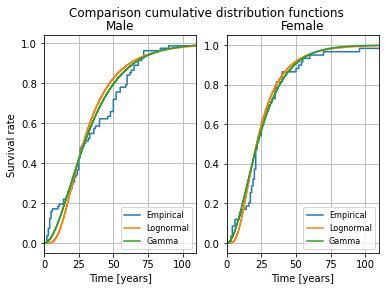

In [25]:
fig, ax = plt.subplots(ncols=2, sharex=True)
fig.suptitle('Comparison cumulative distribution functions')
z = np.linspace(0, 110, 1000)

for i, t in enumerate((t_m, t_f)):
    F = empirical_cdf(t)
    ax[i].step(z, F(z), label='Empirical')

    mu, sigma_sq, Ex = estimate_moments_lognormal(t)
    ax[i].step(z, scipy.stats.lognorm.cdf(z, s=np.sqrt(sigma_sq), scale=np.exp(mu)), label='Lognormal')

    alpha, beta, Ex = estimate_moments_gamma(t)
    ax[i].step(z, scipy.stats.gamma.cdf(z, a=alpha, scale=beta), label='Gamma')

    ax[i].grid('True')
    ax[i].legend(loc='lower right', prop={'size': 8})

ax[0].set(
    xlabel = 'Time [years]',
    ylabel = 'Survival rate',
    title = 'Male',
    xlim = (0, 110)
)

ax[1].set(
    xlabel = 'Time [years]',
    title = 'Female',
    xlim = (0, 110)
)

plt.show()

Both the log-normal and the gamma distribution seem to fit the data. There are some minor differences, and it looks as the gamma distribution is most appropriate for males. For females, the differences between log-normal and gamma are even smaller.

### Task 3d

Analytical median = 12.476
Calculated median = 12.675


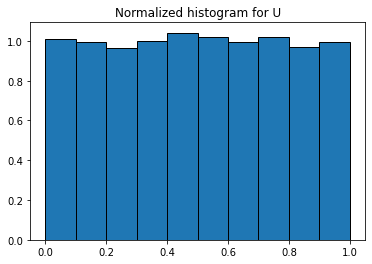

In [26]:
n = 10_000
lmbda = 48
alpha = 3

def F(x, lmbda=48, alpha=3):
    return 1 - (1 + x/lmbda)**(-alpha) * (x>0)

u = np.random.uniform(0, 1, n)
plt.hist(u, density=True, edgecolor='black')
plt.title('Normalized histogram for U')

x = scipy.stats.lomax(c=alpha, scale=lmbda)
X = x.rvs(size=n)
print(f'Analytical median = {x.median():.3f}')
print(f'Calculated median = {np.median(X):.3f}')

plt.show()

### Task 3e

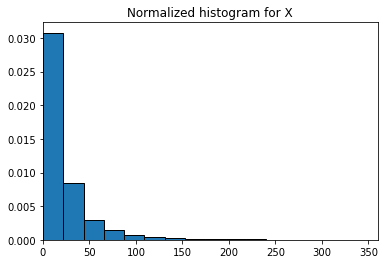

In [27]:
plt.hist(X, bins=50, density=True, edgecolor='black')
plt.title('Normalized histogram for X')
plt.xlim(0, 360)
plt.show()

### Task 3f

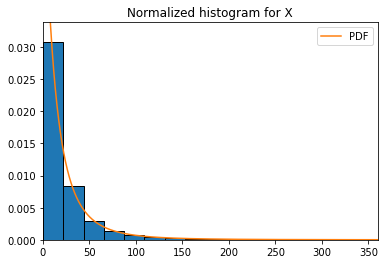

In [28]:
# copy code from last cell

y, *_ = plt.hist(X, bins=50, density=True, edgecolor='black')

t = np.linspace(0, 360, n)
plt.plot(t, x.pdf(t), label='PDF')

plt.title('Normalized histogram for X')
plt.xlim(0, 360)
plt.ylim(None, 1.1*y.max())
plt.legend()
plt.show()